In this notebook we will guide you through our solution for the second homework of ADA.

# Part 1: Extracting the options from the dropdown menu

We start with the URL from the [homepage](http://isa.epfl.ch/imoniteur_ISAP/%21gedpublicreports.htm?ww_i_reportmodel=133685247) where you can the select the different years/semesters etc..

In [3]:
%matplotlib inline
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sys
import numpy as np
import matplotlib.pyplot as plt


urlHome = 'http://isa.epfl.ch/imoniteur_ISAP/\
%21gedpublicreports.htm?ww_i_reportmodel=133685247'

We then use requests and BeautifulSoup to import the HTML data from the homepage.

In [4]:
home = requests.get(urlHome)
homeSoup = BeautifulSoup(home.content,'lxml')

The insepetion tool of our browser helped learn that we were to access a #document that is in the frame of one of the framesets of the HTML page, the document is sourced from another page of IS-Academia that we have to access. To access it, we scroll through the framesets and create a list of all the frames. 

In [5]:
iframe = []
for frame in homeSoup.frameset.find_all('frame'):
    iframe.append(frame)

urlOptions = iframe[1]['src']

print(urlOptions)

!GEDPUBLICREPORTS.filter?ww_i_reportModel=133685247


The url of the source page is found, we can use it to get the other HTML page. Again we use request and beautifulsoup 
to import the HTML data from this new page.

In [6]:
urlOptions = 'http://isa.epfl.ch/imoniteur_ISAP/' + urlOptions
options = requests.get(urlOptions)
soupOptions = BeautifulSoup(options.content,'lxml')





From this beautifulsoup object we can create a dictionary containing the name of each form parameters as key and the value of each parameters as value. We do this by scrolling to the option tag which contains this information.

In [7]:
#dictionary with the name and the value of each parameters
dic_name_value = {}

#Loop that passes trough all the option tag
for f in soupOptions.find_all('option'):
    
    #Filling of the dictionary
    dic = {f.string : f.attrs["value"]}
    dic_name_value.update(dic)


    
print(dic_name_value)

{'2015-2016': '213638028', '2010-2011': '39486325', '2014-2015': '213637922', 'Mineur semestre 2': '2335676', '2012-2013': '123456101', 'Génie électrique et électronique ': '943936', 'Génie mécanique': '944263', 'Stage automne 3ème année': '953137', None: 'null', 'Microtechnique': '945244', 'Bachelor semestre 6': '942175', 'Bachelor semestre 3': '942155', 'Stage automne 4ème année': '2226616', 'Bachelor semestre 5b': '2226768', '2008-2009': '978187', 'Sciences et technologies du vivant': '945901', 'Systèmes de communication': '946228', 'Mineur semestre 1': '2335667', 'Science et génie des matériaux': '944917', 'Master semestre 4': '2230140', 'Bachelor semestre 2': '249114', 'Stage printemps 4ème année': '2226626', 'Bachelor semestre 6b': '2226785', '2016-2017': '355925344', '2009-2010': '978195', 'Chimie et génie chimique': '246696', 'Cours de mathématiques spéciales': '943282', 'Management de la technologie': '946882', 'Semestre automne': '953159', '2013-2014': '213637754', 'Stage pri

We separate this dictionary into smaller dictionaries specific to each form parameters. Which means one for the section, one for the academic period, etc. We do this specifically for the bachelor students, in order to complete the first task.

In [8]:
#From the dictionnary we created before with the name and the value, we extract the parameters that we want. 
#We create separated dictionary for every form parameters.

#First parameter: Informatique
parameter_section = {'Informatique' : (dic_name_value['Informatique'])}
print(parameter_section)


#Seconde parameter: Semester

#Initialization of the dictionary
parameter_semester = {}



#Loop that will pass trough the whole dictionary and select the ones that start with Semestre
for key,value in dic_name_value.items():
    if key is not None: #checking for none because it exist in the keys. With this no error will be returned due to nonetype
        if key.startswith('Semestre d'):
            parameter_semester[key]=value
print(parameter_semester)


#Third parameter: years
parameter_years = {}

for key,value in dic_name_value.items():
    if key is not None: #checking for none because it exist in the keys. With this no error will be returned due to nonetype
        if key.startswith('2'):
            parameter_years[key]=value
            
print(parameter_years)


#Fourth parameter: Pedagogical period

test = ["Ba"]   #test = ["Ba", "Ma","Min","Mis","Pro","Sem","Sta"]
parameter_period = {};
for key,value in dic_name_value.items():
    if key is not None: #checking for none because it exist in the keys. With this no error will be returned due to nonetype
        if key.startswith(tuple(test)):
            parameter_period[key]=value
print(parameter_period)



{'Informatique': '249847'}
{'Semestre de printemps': '2936295', "Semestre d'automne": '2936286'}
{'2015-2016': '213638028', '2010-2011': '39486325', '2013-2014': '213637754', '2008-2009': '978187', '2012-2013': '123456101', '2009-2010': '978195', '2007-2008': '978181', '2016-2017': '355925344', '2011-2012': '123455150', '2014-2015': '213637922'}
{'Bachelor semestre 2': '249114', 'Bachelor semestre 1': '249108', 'Bachelor semestre 5b': '2226768', 'Bachelor semestre 6': '942175', 'Bachelor semestre 3': '942155', 'Bachelor semestre 6b': '2226785', 'Bachelor semestre 5': '942120', 'Bachelor semestre 4': '942163'}


From theses dictionaries, we load the data directly from the IS-academia servers using pd.read_html. We use the standard url and we change the form parameters values for each values in each dictionaries using the %s method.

In [9]:
# Now we want to request the is-academia servers for the specific data we need, using the dictionaries that we created
#before. We will use for loop passing trough every dictionaries in order to compose the multiple requests needed.

data_all = pd.DataFrame()

#Multiple loop that permits to use each values in each dictionaries
for value_section in parameter_section.values():
    for value_years in parameter_years.values(): 
        for key_period, value_period in parameter_period.items(): #here we also retrieve the key, because it is needed afterward
            for value_semester in parameter_semester.values():
                
                #We use a try to prevent the problem when there is a empty list.
                try:
                    #The url is changed for every values in each loops
                    student_data = pd.read_html('http://isa.epfl.ch/imoniteur_ISAP//!GEDPUBLICREPORTS.html?ww_x_GPS=-1&ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270&ww_x_UNITE_ACAD=%s&ww_x_PERIODE_ACAD=%s&ww_x_PERIODE_PEDAGO=%s&ww_x_HIVERETE=%s' % (value_section, value_years, value_period, value_semester))
                    
                    
                    #The data is reshaped to be more suite for subsequent analysis
                    student_data[0].columns = student_data[0].loc[[1]].values.reshape(12,)
                    student_data[0].drop(student_data[0].index[[0,1]],inplace=True)
                    student_data[0] = student_data[0][['Civilité','Nom Prénom',]]
                    student_data[0]['Periode Académique'] = key_period
                    
                    #Each block of data is concatenated to have a unique dataframe
                    data_all = pd.concat([data_all, student_data[0]], axis = 0)

                    
                    
                except:
                    pass
                

                
data_all

,Civilité,Nom Prénom,Periode Académique
2,Monsieur,Abbey Alexandre,Bachelor semestre 2
3,Monsieur,Ahmed Fares,Bachelor semestre 2
4,Monsieur,Amrani Mounir,Bachelor semestre 2
5,Monsieur,Andreu Philippe,Bachelor semestre 2
6,Madame,Baert-Yue Antonine Elisa,Bachelor semestre 2
7,Monsieur,Bagnoud Jérôme,Bachelor semestre 2
8,Monsieur,Barras Luca,Bachelor semestre 2
9,Monsieur,Basseto Louis Michel Elie,Bachelor semestre 2
10,Monsieur,Besomi Jonathan Corrado Maria,Bachelor semestre 2
11,Monsieur,Bilat Loïs,Bachelor semestre 2


Now we have all the data in a proper order and labeled with their academic period (For the bachelor only). We want ot compute the time made by student to achieve their bachelor. So first we will need to select student that have an entry in both Bachelor semestre 1 and Bachelor semestre 6. The process is a bit circonvoluted so here is a summary.

- Select student that are in bachelor 1 and remove the duplicates from this list. (using isin and drop_duplicates)
- Select student that are in bachelor 6 and remove tthe duplicates form this list (using isin and drop_duplicates)
- Concatenate these two new dataframe
- Select the duplicates in this dataframe with the function duplicated. 

Now we have a dataframe containing only the student that have an entry in both bach. 1 and 6. 



In [10]:
#Here we take the student that are in bachelor 1 and we remove the duplicates

student_bachelor_1 = data_all[data_all['Periode Académique'].isin(['Bachelor semestre 1'])]

student_bachelor_1_unique = student_bachelor_1.drop_duplicates(subset='Nom Prénom')


#Here we take the student that are in bachelor 6 and we remove the duplicates

student_bachelor_6 = data_all[data_all['Periode Académique'].isin(['Bachelor semestre 6'])]

student_bachelor_6_unique = student_bachelor_6.drop_duplicates(subset='Nom Prénom')
student_bachelor_6_unique

#Concatenation of the 2 duplicates.
student_bachelor_1_6 = pd.concat([student_bachelor_1_unique, student_bachelor_6_unique])
student_bachelor_1_6

#Select the duplicates
student_bachelor_unique = student_bachelor_1_6[student_bachelor_1_6.duplicated(subset='Nom Prénom')]
student_bachelor_unique

,Civilité,Nom Prénom,Periode Académique
2,Monsieur,Aiulfi Loris Sandro,Bachelor semestre 6
3,Monsieur,Alfonso Peterssen Alfonso,Bachelor semestre 6
4,Monsieur,Alonso Seisdedos Florian,Bachelor semestre 6
5,Monsieur,Angerand Grégoire Georges Jacques,Bachelor semestre 6
7,Madame,Baraschi Zoé,Bachelor semestre 6
8,Monsieur,Birchmeier Alain Dominique,Bachelor semestre 6
9,Monsieur,Boissaye Arnaud Didier Marie,Bachelor semestre 6
10,Monsieur,Bonfils Nils Pascal,Bachelor semestre 6
11,Monsieur,Bonnome Hugo,Bachelor semestre 6
12,Monsieur,Bordenca Tobias,Bachelor semestre 6


We separate the group between men and women using groupby

In [11]:


grouped_sex = student_bachelor_unique.groupby('Civilité')
# Survival statistics for men
men = grouped_sex.get_group('Monsieur')


grouped_sex = student_bachelor_unique.groupby('Civilité')
# Survival statistics for men
women = grouped_sex.get_group('Madame')
women



,Civilité,Nom Prénom,Periode Académique
7,Madame,Baraschi Zoé,Bachelor semestre 6
28,Madame,Djambazovska Sandra,Bachelor semestre 6
29,Madame,Dopiro Ekaterina,Bachelor semestre 6
46,Madame,Gucevska Natalija,Bachelor semestre 6
49,Madame,Hentgen Emily Sandrine Victoria,Bachelor semestre 6
67,Madame,Mollier Lauriane Catherine Emilienne,Bachelor semestre 6
69,Madame,Montero Hernandez Aimée,Bachelor semestre 6
85,Madame,Reiss Saskia Naomi,Bachelor semestre 6
87,Madame,Richard Lou Fortunée Valentine Yvonne Émilie,Bachelor semestre 6
22,Madame,Heldner Céline,Bachelor semestre 6


We create a dataframe containing the name and the number of time each students appears. To do so we first compute the number of unique entry in the dataframe containing all the data using value_counts(). The number returned represent the number of Bachelor semester that each unique student has been registered. Then ,to collect this data, wefor each unique student we create a dictionary that will be used to created a dataframe containing the final value. The column Semestre represent the number of semestre done by each student. The dataframe is created both for men and women. 

In [19]:
#Computation for the men



dic_counts_men = []

#Count the number of unique value in all the data. This represent the number of semester done by each student
list_count_all = data_all['Nom Prénom'].value_counts()


#We ceate a list of dictionary that can be used to create a dataframe. We pass trough each unique student name for men
# and for women (see next cell)
for name in men['Nom Prénom']:

    dic_counts_trans = {'Nom Prénom' : name, 'Semestre' : list_count_all[name]}
    dic_counts_men.append(dic_counts_trans)
    

#Creation of the dataframe. 
men_counts_raw = pd.DataFrame(dic_counts_men)

#Here we filter the students that less than 6 semester. This should not be necessary as the minimum number should be 
#6 semester but by using a histogramme we find out that there was a very small number of students with 4 semester.
#That should not be possible with our code and we did not find out the reason why it happen. 
#As it was a really small number and that normally student should have a minimum of 6 semester, we decided to filter
#them out.
men_counts = men_counts_raw.query('Semestre > 5')


    



In [20]:
#Computation for the men

dic_counts_women = []

#Count the number of unique value in all the data. This represent the number of semester done by each student
list_count_all = data_all['Nom Prénom'].value_counts()


#We ceate a list of dictionary that can be used to create a dataframe
for name in women['Nom Prénom']:

    dic_counts_trans = {'Nom Prénom' : name, 'Semestre' : list_count_all[name]}
    dic_counts_women.append(dic_counts_trans)
    

#Creation of the dataframe.
women_counts = pd.DataFrame(dic_counts_women)


women_counts

,Nom Prénom,Semestre
0,Baraschi Zoé,9
1,Djambazovska Sandra,6
2,Dopiro Ekaterina,6
3,Gucevska Natalija,6
4,Hentgen Emily Sandrine Victoria,6
5,Mollier Lauriane Catherine Emilienne,8
6,Montero Hernandez Aimée,6
7,Reiss Saskia Naomi,11
8,Richard Lou Fortunée Valentine Yvonne Émilie,9
9,Heldner Céline,6


Now we can average the number of semester students did, for men and women.

In [21]:
men_counts.mean()


Semestre    7.114441
dtype: float64

In [22]:
women_counts.mean()

Semestre    6.793103
dtype: float64

We can visualize the distribution of these two group using histogram.


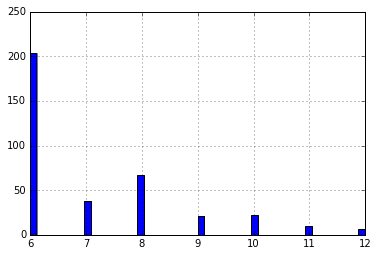

In [23]:
men_data = men_counts['Semestre']
women_data = women_counts['Semestre']

men_data.hist(bins = 50)


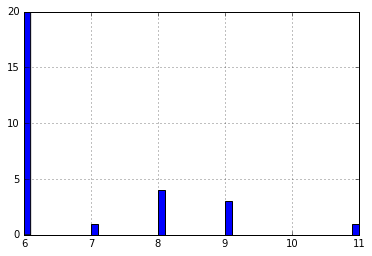

In [24]:
women_data.hist(bins = 50)

We test if the difference of the means between men and women is statistically significant.

In [120]:
from scipy.stats import ttest_ind





ttest_ind(men_data, women_data)



Ttest_indResult(statistic=1.0643000334248733, pvalue=0.2878429746516184)

We can see that it is not.